In [25]:
from sklearn.datasets import load_boston
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

## Data Preparation

In [5]:
data=load_boston()
bostonDF=pd.DataFrame(data.data, columns=data.feature_names)
bostonDF['Target']=data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(bostonDF.drop(columns=['Target']), bostonDF['Target'], test_size=0.2, random_state=22)

## Pipelines

In [7]:
Models=[Pipeline(steps=[('Standardization', StandardScaler()),
                      ('Linear Regression', LinearRegression(normalize=True))]),
        Pipeline(steps=[('Standardization', StandardScaler()),
                        ('preprocessor', PCA(2)),
                      ('Linear Regression with PCA', LinearRegression(normalize=True))]),
        Pipeline(steps=[('Standardization', StandardScaler()),
                        ('Lasso', Lasso(normalize=True))]),
        Pipeline(steps=[('Standardization', StandardScaler()),
                        ('Lasso alpha 0.01', Lasso(alpha=0.01, normalize=True))]),
        Pipeline(steps=[('Standardization', StandardScaler()),
                      ('Ridge', Ridge(normalize=True))]),
        Pipeline(steps=[('Standardization', StandardScaler()),
                      ('Ridge with alpha 0.01', Ridge(alpha = 0.01, normalize=True))]),
       Pipeline(steps=[('Standardization', StandardScaler()),
                      ('ElasticNet', ElasticNet(normalize=True))]),
       Pipeline(steps=[('Standardization', StandardScaler()),
                      ('ElasticNet with alpha 0.01', ElasticNet(alpha = 0.01, normalize=True))])]

In [10]:
rows=[]
for model in Models:
    model.fit(X_train, y_train)
    rows.append([model.steps[-1][0], model.score(X_train, y_train), mse(model.predict(X_train), y_train), model.score(X_test, y_test), mse(model.predict(X_test), y_test)])

pd.DataFrame(rows, columns=['Name', 'train R2', 'train MSE', 'test R2', 'test MSE'])


,Name,train R2,train MSE,test R2,test MSE
0,Linear Regression,0.729594,22.534576,0.765747,20.770685
1,Linear Regression with PCA,0.388678,50.945172,0.495690,44.715941
2,Lasso,0.000000,83.336123,-0.000610,88.721713
3,Lasso alpha 0.01,0.711552,24.038122,0.736640,23.351517
4,Ridge,0.619735,31.689790,0.671696,29.109904
5,Ridge with alpha 0.01,0.729353,22.554684,0.764548,20.877003
6,ElasticNet,0.000000,83.336123,-0.000610,88.721713
7,ElasticNet with alpha 0.01,0.531211,39.067024,0.576935,37.512166


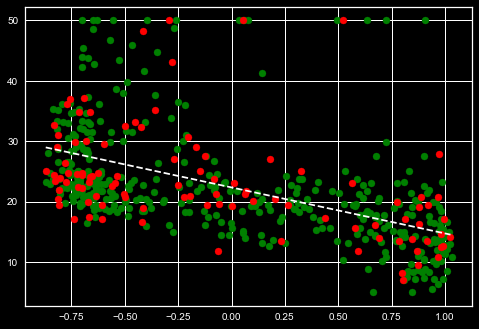